# Amazon Reviews Sentiment Analysis

![Picture title](img/image-20221112-174143.png)

## Import the Libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urlencode
import csv

requests allows you to send HTTP requests to a server that returns a Response Object with all the response data (i.e. HTML).
BeautifulSoup (bs4) is used to pull data out of HTML files and convert the data to a BeautifulSoup object, which represents the HTML as a nested data structure.
pandas is used for data analysis and manipulation.
urllib can be used for many purposes, including reading website content, making HTTP and HTTPS requests, sending request headers, and retrieving response headers.
csv module implements classes to read and write tabular data in CSV format.

## Review the Web Page’s HTML Structure

We need to understand the structure and contents of the HTML tags within the web pages. We will be using the Amazon webpage and searching for Apple Watch Series 7 GPS + Cellular (shown below). You can find this webpage by selecting this  link and scrolling down to the reviews section.

![Picture title](img/image-20221112-150900.png)

We can scrape this webpage by parsing the HTML of the page and extracting the information needed for our dataset

we will extract the following data elements from the reviews:

Reviewer Names
Reviews

## Retrieve HTML data and Extract the Data Elements

In [2]:
# Define a list of URL's that will be scraped.
list_of_urls = ['https://www.amazon.com/Apple-Watch-Cellular-Midnight-Aluminum/product-reviews/B09PB1PTH8/ref=cm_cr_othr_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
'https://www.amazon.com/Apple-Watch-Cellular-Midnight-Aluminum/product-reviews/B09PB1PTH8/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2',
'https://www.amazon.com/Apple-Watch-Cellular-Midnight-Aluminum/product-reviews/B09PB1PTH8/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=3',
'https://www.amazon.com/Apple-Watch-Cellular-Midnight-Aluminum/product-reviews/B09PB1PTH8/ref=cm_cr_getr_d_paging_btm_next_4?ie=UTF8&reviewerType=all_reviews&pageNumber=4',
'https://www.amazon.com/Apple-Watch-Cellular-Midnight-Aluminum/product-reviews/B09PB1PTH8/ref=cm_cr_getr_d_paging_btm_next_5?ie=UTF8&reviewerType=all_reviews&pageNumber=5']

In [3]:
# Retrieve each of the url's HTML data and convert the data into a beautiful soup object.  
# Find, extract and store reviewer names and review text into a list.
names = []
reviews = []
data_string = ""
for url in list_of_urls: 
    params = {'api_key': "ce7a385c717c6948e16f7ccb5b427d9e", 'url': url}
    response = requests.get('http://api.scraperapi.com/',   params=urlencode(params))
    soup = BeautifulSoup(response.text, 'html.parser')
    for item in soup.find_all("span", class_="a-profile-name"):
      data_string = data_string + item.get_text()
      names.append(data_string)
      data_string = ""  
    for item in soup.find_all("span", {"data-hook": "review-body"}):
      data_string = data_string + item.get_text()
      reviews.append(data_string)
      data_string = ""

## Create the Dictionary

We will create a dictionary that will contain the data names and values for the data elements that were extracted.

In [4]:
# Create the dictionary.
reviews_dict = {'Reviewer Name': names, 'Reviews': reviews}
# Print the lengths of each list.  
print(len(names), len(reviews))

54 44


## Create the Data Frame

We need to adjust for missing values in columns. This step will create the data frame as each key was a row and like this, the missing values are actually missing columns which is no problem for pandas (only missing rows lead to ValueError during creation). We need to transpose the data frame (flip the axis) and change the rows to columns. We also need to clean some of the data.

In [5]:
# Create a new dataframe.
df = pd.DataFrame.from_dict(reviews_dict, orient='index')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
Reviewer Name,David,Makenna Meyers,David,Florencia,Amazon Customer,Anthony Taylor,Austin Richardson,Denisnunez,Amanda Boyd,Sheila Larson,...,Quite Contrary,Brittney,jeanette s.,Mary Barton,David,Makenna Meyers,Rebecca Liller,Nate,Julián rojas,Riley G
Reviews,\nI can’t tell this was a refurb. The packagin...,\nGood product and very nice size\n,\nEverything looks and feels new for a resale ...,\nGreat product. Syncs well with my iPhone. Ba...,"\nBought this for myself months ago, watch cam...",\nI love it .\n,\nOrdered this refurbished watch and the watch...,\nI can’t even charge my watch right off the b...,\nGift to my niece who is an RN\n,\nWorks great\n,...,None,None,None,None,None,None,None,None,None,None


In [6]:
# Delete all the columns that have missing values.
df.dropna(axis=1, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
Reviewer Name,David,Makenna Meyers,David,Florencia,Amazon Customer,Anthony Taylor,Austin Richardson,Denisnunez,Amanda Boyd,Sheila Larson,...,Norman C. Straker,Machele Lugo,David,Makenna Meyers,Stephanie Paulette,travis schwarz,Dustin Spray,S. J. Twigg,Ella M. Ryder,thevin
Reviews,\nI can’t tell this was a refurb. The packagin...,\nGood product and very nice size\n,\nEverything looks and feels new for a resale ...,\nGreat product. Syncs well with my iPhone. Ba...,"\nBought this for myself months ago, watch cam...",\nI love it .\n,\nOrdered this refurbished watch and the watch...,\nI can’t even charge my watch right off the b...,\nGift to my niece who is an RN\n,\nWorks great\n,...,"\nToo hard to figure it out, especially for se...",\nI got the “green snake of death” or “red sna...,\nDoesn’t turn on and the wrong charge cube wa...,\nI got this watch today Having a hard time pa...,\nThis is not a brand new watch\n,\nThe watch only comes with half a charger. Yo...,\nSo far I love or. No issues with delivery or...,\nIt seem to be working fine didn’t get the ri...,\nBufno\n,\nReceived the watch in the mail and it wouldn...


In [7]:
# Transpose the dataframe.
prod_reviews = df.T
print(prod_reviews.head(10))

       Reviewer Name                                            Reviews
0              David  \nI can’t tell this was a refurb. The packagin...
1     Makenna Meyers                \nGood product and very nice size\n
2              David  \nEverything looks and feels new for a resale ...
3          Florencia  \nGreat product. Syncs well with my iPhone. Ba...
4    Amazon Customer  \nBought this for myself months ago, watch cam...
5     Anthony Taylor                                    \nI love it .\n
6  Austin Richardson  \nOrdered this refurbished watch and the watch...
7         Denisnunez  \nI can’t even charge my watch right off the b...
8        Amanda Boyd                  \nGift to my niece who is an RN\n
9      Sheila Larson                                    \nWorks great\n


In [8]:
# Remove special characters from review text.
prod_reviews['Reviews'] = prod_reviews['Reviews'].str.replace('\n','')
prod_reviews.head(5)

,Reviewer Name,Reviews
0,David,I can’t tell this was a refurb. The packaging ...
1,Makenna Meyers,Good product and very nice size
2,David,Everything looks and feels new for a resale item
3,Florencia,Great product. Syncs well with my iPhone. Batt...
4,Amazon Customer,"Bought this for myself months ago, watch came ..."


In [9]:
prod_reviews.shape

(44, 2)

In [10]:
# Convert dataframe to CSV file.
prod_reviews.to_csv('dataset/reviews.csv', index=False, header=True)

## Sentiment Analysis

Sentiment Analysis is a use case of Natural Language Processing (NLP) and comes under the category of text classification. To put it simply, Sentiment Analysis involves classifying a text into various sentiments, such as positive or negative, Happy, Sad or Neutral, etc. Thus, the ultimate goal of sentiment analysis is to decipher the underlying mood, emotion, or sentiment of a text. This is also known as Opinion Mining

![Picture title](image-20221112-155243.png)

In [11]:
#pip install transformers

In [12]:
#import transformers

In [13]:
from textblob import TextBlob

In [22]:
data=TextBlob(prod_reviews.Reviews[5])
print(data.sentiment)
print(prod_reviews.Reviews[5])
if 0<data.sentiment[0]<0.5 :
    print('Neutral')

Sentiment(polarity=0.5, subjectivity=0.6)
I love it .


We can see the output is categorized between two — Polarity and Subjectivity.

Polarity is a float value within the range [-1.0 to 1.0] where 0 indicates neutral, +1 indicates a very positive sentiment and -1 represents a very negative sentiment.

Subjectivity is a float value within the range [0.0 to 1.0] where 0.0 is very objective and 1.0 is very subjective. Subjective sentence expresses some personal feelings, views, beliefs, opinions, allegations, desires, beliefs, suspicions, and speculations where as Objective sentences are factual.

In [24]:
prod_reviews['Review Type']=0
for i in range(len(prod_reviews)):
    data=TextBlob(prod_reviews.Reviews[i])
    if data.sentiment[0]>=0.5:
        prod_reviews['Review Type'][i]='Positive'
    if 0<=data.sentiment[0]<0.5 :
        prod_reviews['Review Type'][i]='Neutral'
    if data.sentiment[0]<0 :
        prod_reviews['Review Type'][i]='Negative'
    



/tmp/ipykernel_124/512394660.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_reviews['Review Type'][i]='Neutral'
/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [25]:
prod_reviews

,Reviewer Name,Reviews,Review Type
0,David,I can’t tell this was a refurb. The packaging ...,Neutral
1,Makenna Meyers,Good product and very nice size,Positive
2,David,Everything looks and feels new for a resale item,Neutral
3,Florencia,Great product. Syncs well with my iPhone. Batt...,Positive
4,Amazon Customer,"Bought this for myself months ago, watch came ...",Neutral
5,Anthony Taylor,I love it .,Positive
6,Austin Richardson,Ordered this refurbished watch and the watch i...,Neutral
7,Denisnunez,I can’t even charge my watch right off the bat...,Neutral
8,Amanda Boyd,Gift to my niece who is an RN,Neutral
9,Sheila Larson,Works great,Positive


<AxesSubplot: title={'center': 'Review Types'}, ylabel='Review Type'>

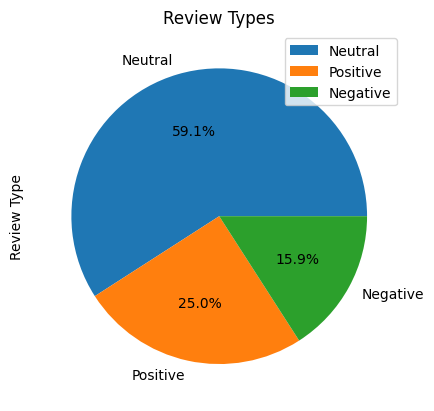

In [31]:
res=pd.DataFrame(prod_reviews['Review Type'].value_counts())
res.plot.pie(y='Review Type',autopct='%1.1f%%',title="Review Types")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9e47c222-1b16-48a4-a01a-b9a305501956' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>